# Simple Category Space

Two categories on a 1D linear space

Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [4]:
from src.category_model import SimpleCategorySpace

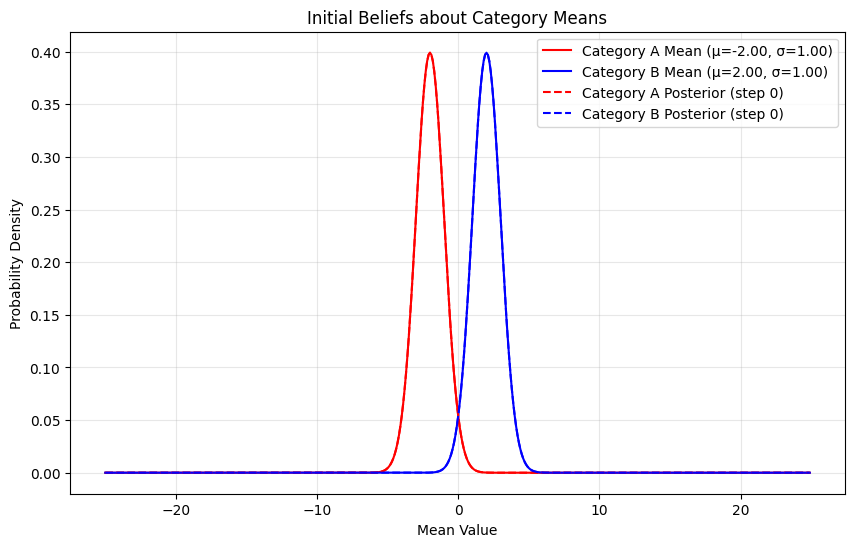

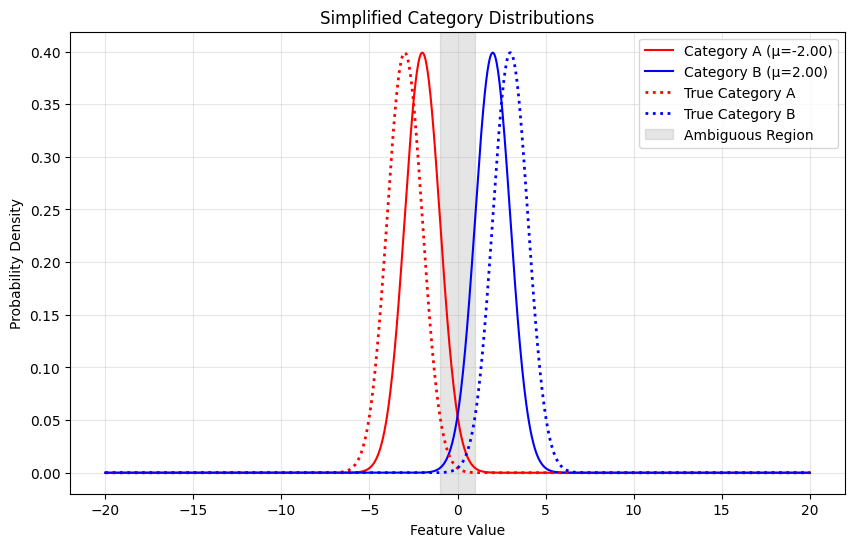

Initial Expected Information Gain:


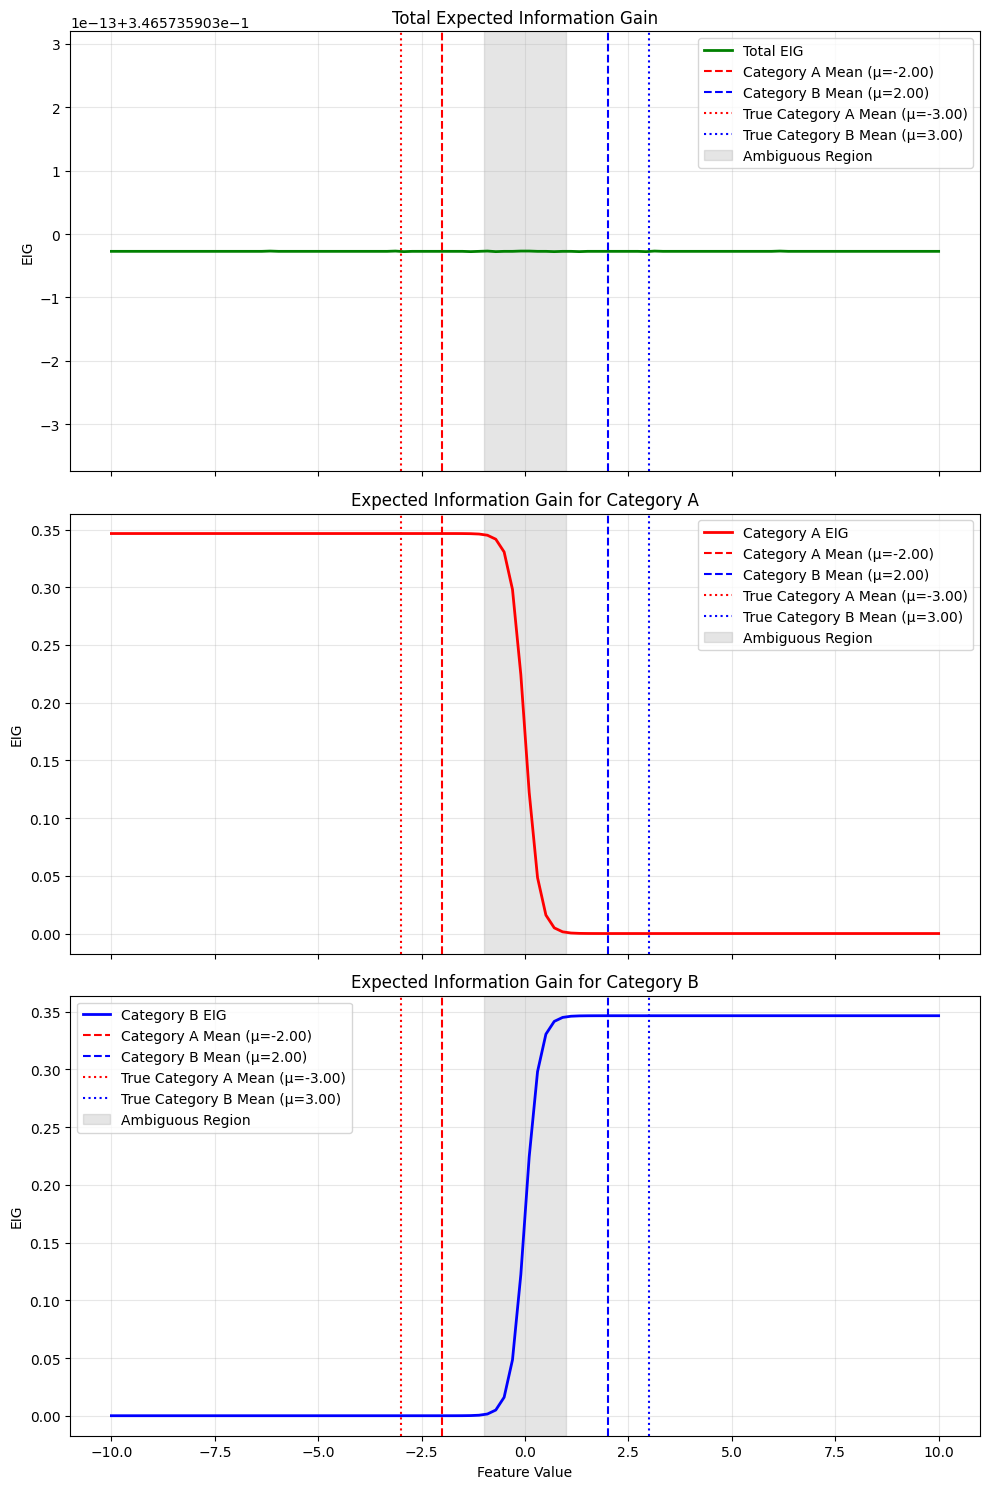


Updating with observations...


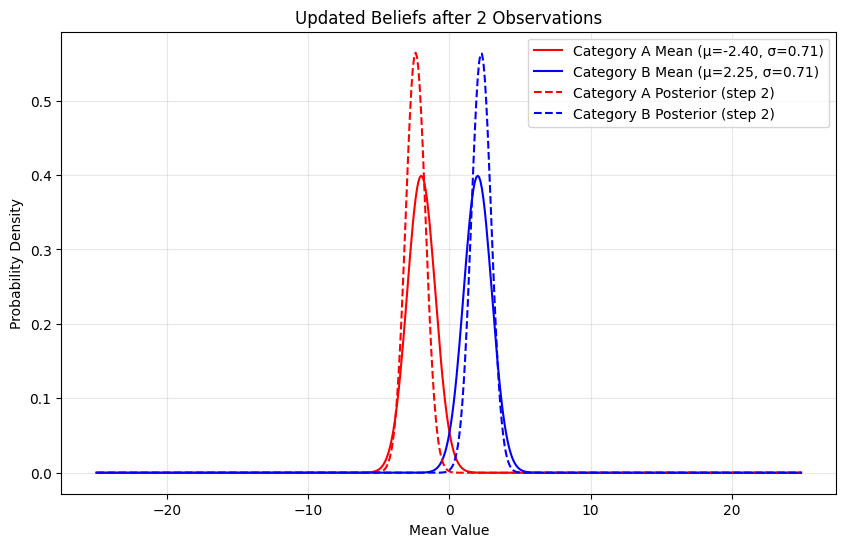

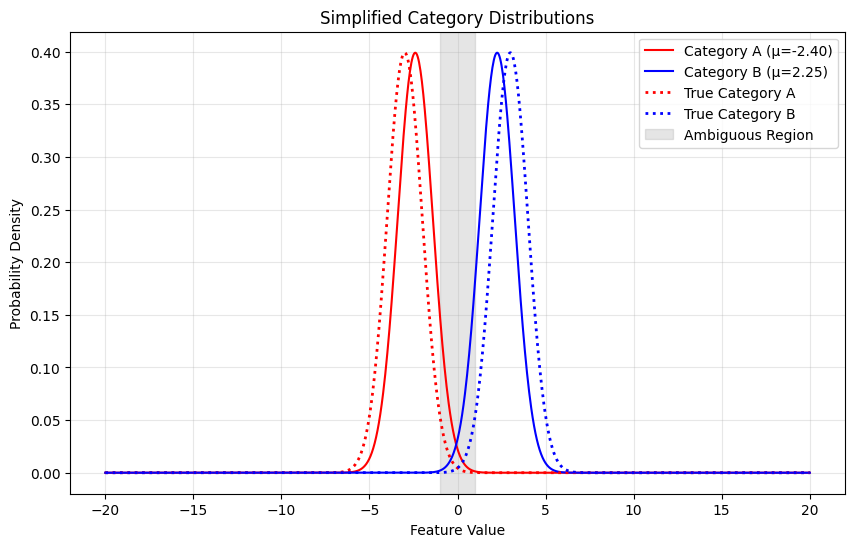


Updated Expected Information Gain:


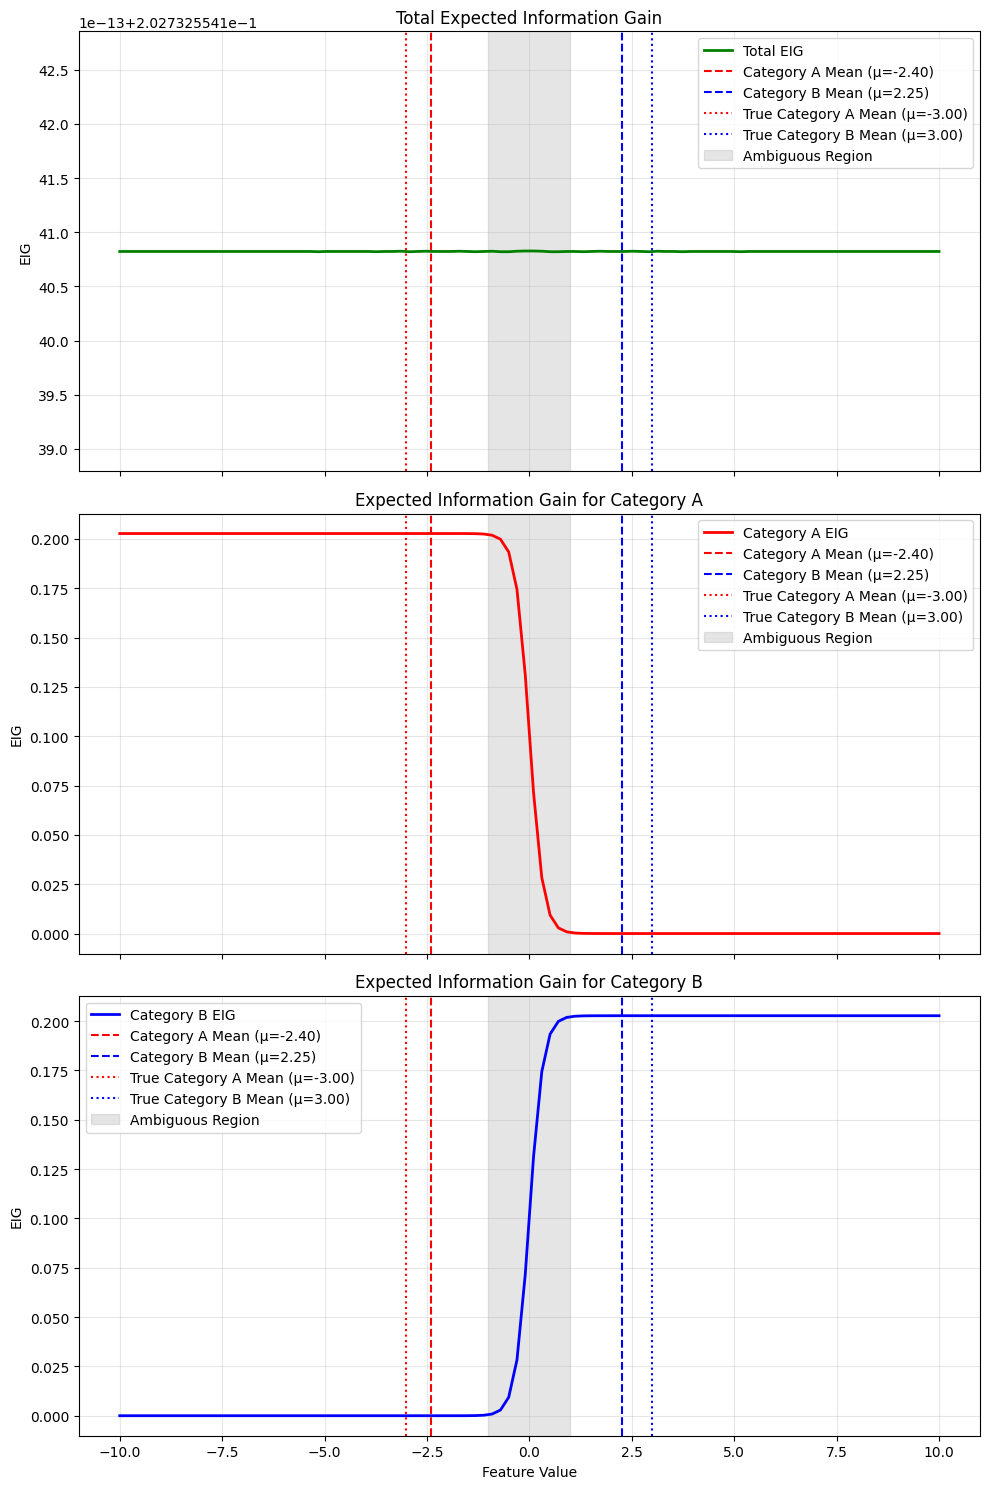

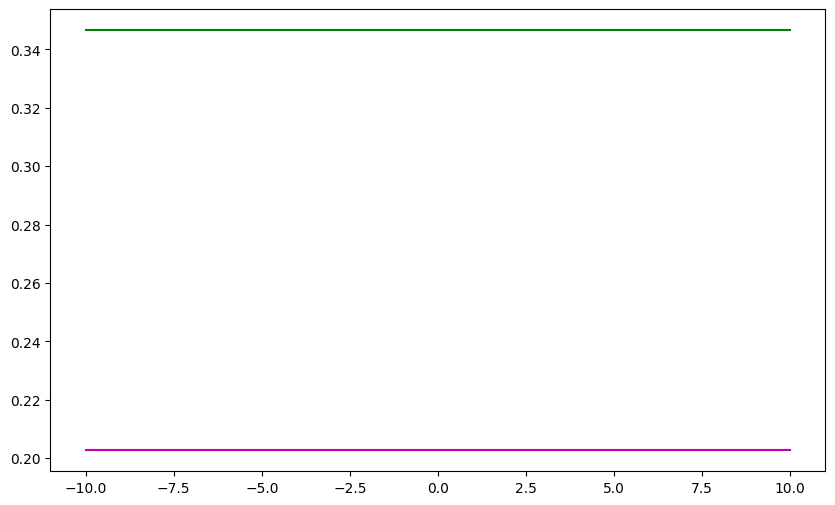

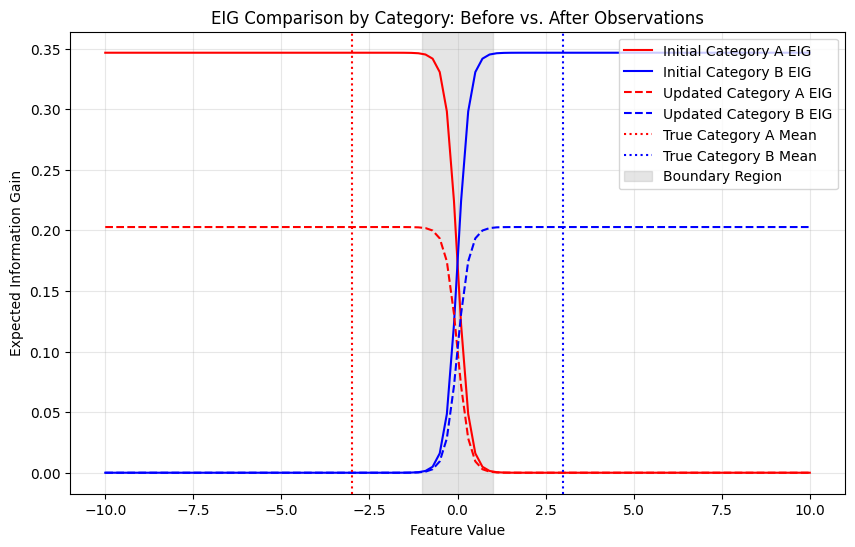


Comparing different prior configurations:


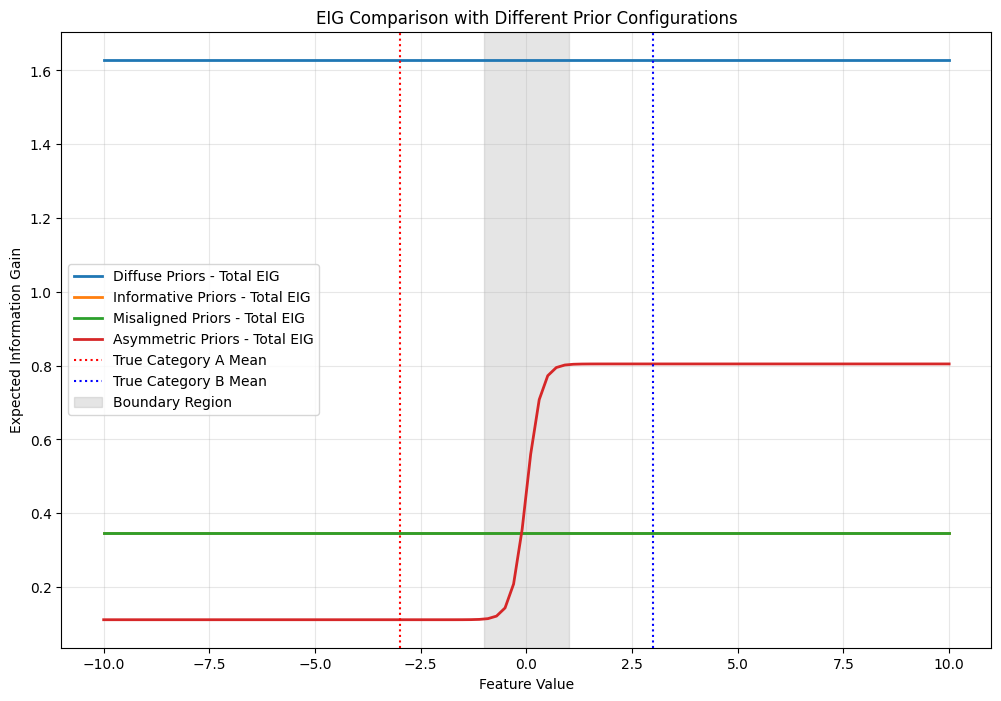

In [5]:
# Create model with informative priors
# More separated means and smaller SDs create more distinct EIG patterns
model = SimpleCategorySpace(mu_prior_means=[-2, 2], mu_prior_sds=[1, 1])

# Set true category parameters
model.set_true_categories(true_mu_a=-3, true_mu_b=3, true_sigma=1)

# Plot initial distributions
model.plot_mean_distributions(title="Initial Beliefs about Category Means")
model.plot_simple_category_distributions(show_true=True)

# Plot initial EIG (separate for total and per-category)
print("Initial Expected Information Gain:")
initial_result = model.plot_eig(separate_plots=True)

# Update with observations
print("\nUpdating with observations...")
model.update_posterior(-2.8, 0)  # Observation near category A
model.update_posterior(2.5, 1)   # Observation near category B

# Plot updated distributions
model.plot_mean_distributions(title="Updated Beliefs after 2 Observations")
model.plot_simple_category_distributions(show_true=True)

# Plot updated EIG
print("\nUpdated Expected Information Gain:")
updated_result = model.plot_eig(separate_plots=True)

# Compare EIG before and after updates (just total EIG for simplicity)
plt.figure(figsize=(10, 6))
plt.plot(initial_result['x_values'], initial_result['eig_values']['total'], 
            'g-', label='Initial Total EIG')
plt.plot(updated_result['x_values'], updated_result['eig_values']['total'], 
            'm-', label='Updated Total EIG')

# Compare per-category EIG before and after updates
plt.figure(figsize=(10, 6))
plt.plot(initial_result['x_values'], initial_result['eig_values']['cat_a'], 
            'r-', label='Initial Category A EIG')
plt.plot(initial_result['x_values'], initial_result['eig_values']['cat_b'], 
            'b-', label='Initial Category B EIG')
plt.plot(updated_result['x_values'], updated_result['eig_values']['cat_a'], 
            'r--', label='Updated Category A EIG')
plt.plot(updated_result['x_values'], updated_result['eig_values']['cat_b'], 
            'b--', label='Updated Category B EIG')

plt.axvline(x=model.true_categories['A']['mean'], color='r', linestyle=':',
            label=f'True Category A Mean')
plt.axvline(x=model.true_categories['B']['mean'], color='b', linestyle=':',
            label=f'True Category B Mean')
plt.axvspan(model.boundary_region[0], model.boundary_region[1], 
        alpha=0.2, color='gray', label='Boundary Region')
plt.title('EIG Comparison by Category: Before vs. After Observations')
plt.xlabel('Feature Value')
plt.ylabel('Expected Information Gain')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Demonstrate changing priors to see how they affect EIG
print("\nComparing different prior configurations:")

# Create models with different priors
models = {
    "Diffuse Priors": SimpleCategorySpace(mu_prior_means=[0, 0], mu_prior_sds=[5, 5]),
    "Informative Priors": SimpleCategorySpace(mu_prior_means=[-2, 2], mu_prior_sds=[1, 1]),
    "Misaligned Priors": SimpleCategorySpace(mu_prior_means=[1, -1], mu_prior_sds=[1, 1]),
    "Asymmetric Priors": SimpleCategorySpace(mu_prior_means=[-1, 3], mu_prior_sds=[0.5, 2])
}

# Set same true categories for all
for name, m in models.items():
    m.set_true_categories(true_mu_a=-3, true_mu_b=3, true_sigma=1)

# Plot EIG comparison
plt.figure(figsize=(12, 8))

for name, m in models.items():
    result = m.calculate_eig_across_range()
    plt.plot(result['x_values'], result['eig_values']['total'], linewidth=2, label=f'{name} - Total EIG')

plt.axvline(x=-3, color='r', linestyle=':', label='True Category A Mean')
plt.axvline(x=3, color='b', linestyle=':', label='True Category B Mean')
plt.axvspan(-1, 1, alpha=0.2, color='gray', label='Boundary Region')
plt.title('EIG Comparison with Different Prior Configurations')
plt.xlabel('Feature Value')
plt.ylabel('Expected Information Gain')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

0.3368645473514209
0.3368645473514218


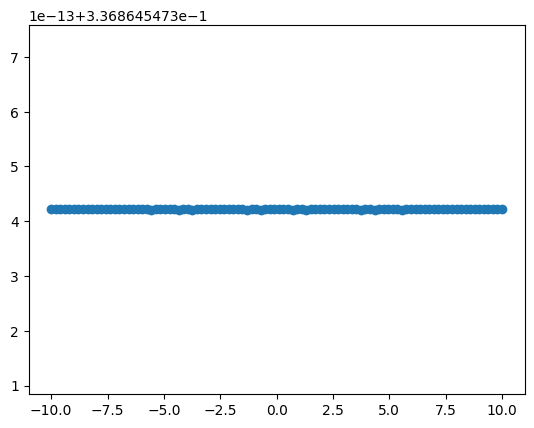

In [14]:
x, y = model.calculate_eig_across_range()

plt.scatter(x = x,
         y = y)

print(min(y))
print(max(y))